<a href="https://colab.research.google.com/github/hanzlayyy/FYDP/blob/main/FYDP_Notebook_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random as rd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [241]:
df = pd.read_csv('https://raw.githubusercontent.com/hanzlayyy/FYDP/main/data%20v1.csv')
df.drop_duplicates(subset=df.iloc[:,:-1], keep='first', inplace=True, ignore_index=False)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


In [242]:
df.dropna(thresh=6, inplace=True)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


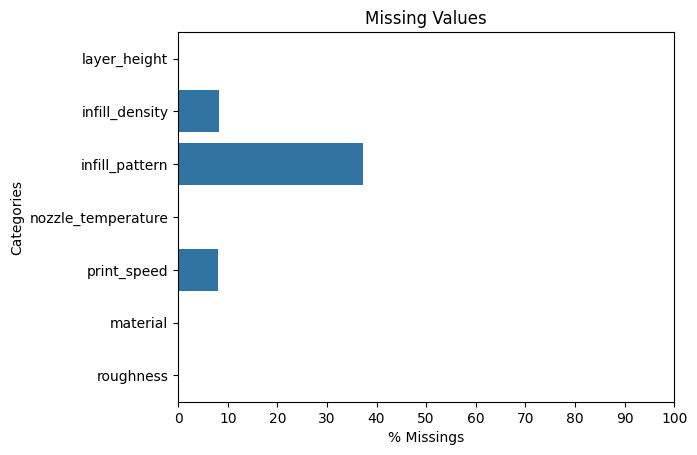

In [243]:
x_1 = pd.Series(df.isnull().mean()*100).values
y_1 = pd.Series(df.isnull().mean()*100).index
sns.barplot(x=x_1, y=y_1, orient='h')
plt.xlabel('% Missings')
plt.xticks(range(0, 110, 10))
plt.ylabel('Categories')
plt.title('Missing Values')
plt.show()

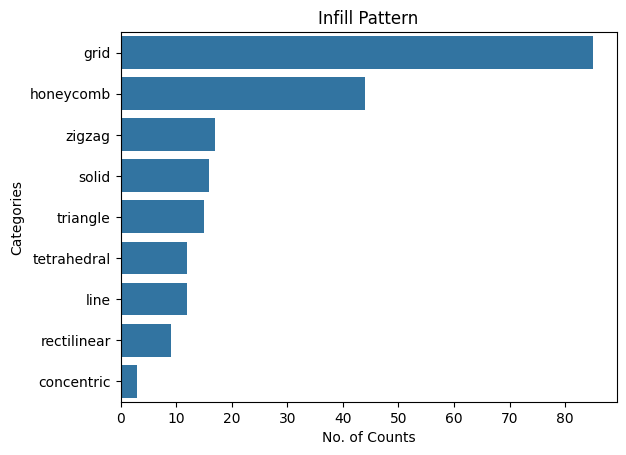

In [244]:
x_2 = pd.Series(df['infill_pattern'].value_counts()).values
y_2 = pd.Series(df['infill_pattern'].value_counts()).index
sns.barplot(x=x_2, y=y_2, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Infill Pattern')
plt.show()

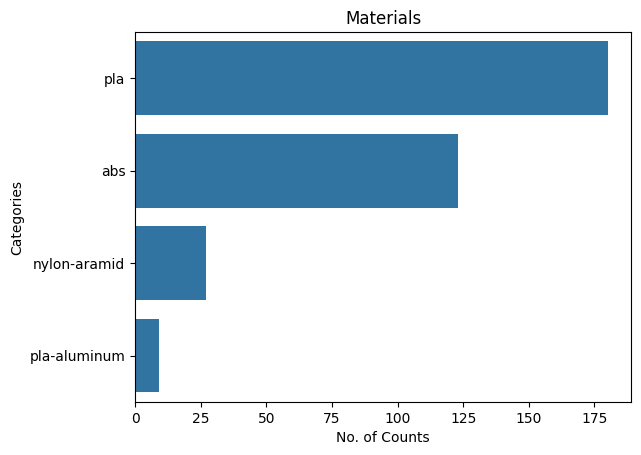

In [245]:
df['material'].value_counts()
x_3 = pd.Series(df['material'].value_counts()).values
y_3 = pd.Series(df['material'].value_counts()).index
sns.barplot(x=x_3, y=y_3, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Materials')
plt.show()

In [246]:
zero_missing = pd.get_dummies(df[~df.isnull().any(axis=1)], columns=['infill_pattern','material'], dtype=int)
zero_missing.sample(10)


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
148,0.20,30.0,195,100.0,16.0,0,0,1,0,0,0,0,0,0,1,0
445,0.10,30.0,200,70.0,19.0,0,1,0,0,0,0,0,0,1,0,0
12,0.06,50.0,230,60.0,118.0,0,1,0,0,0,0,0,0,1,0,0
156,0.20,100.0,240,100.0,13.0,0,0,0,0,0,0,0,1,1,0,0
601,0.20,30.0,200,40.0,14.0,0,1,0,0,0,0,0,0,0,1,0
477,0.40,10.0,220,40.0,9.0,0,0,1,0,0,0,0,0,0,1,0
145,0.20,30.0,195,90.0,15.0,0,0,0,0,0,0,0,1,0,1,0
39,0.15,10.0,220,60.0,163.0,0,0,1,0,0,0,0,0,0,1,0
517,0.10,100.0,215,25.0,14.0,0,0,0,0,0,1,0,0,0,1,0
26,0.10,40.0,205,120.0,176.0,0,1,0,0,0,0,0,0,0,1,0


In [247]:
missing = df[df.isnull().any(axis=1)]
missing_categorical = df[df['infill_pattern'].isnull()]
missing_categorical = pd.get_dummies(missing_categorical, columns=['material'], dtype=int)
missing_categorical[['material_pla-aluminum']] = 0
missing_categorical = missing_categorical.reindex(columns=list(zero_missing.columns))
missing_categorical


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
190,0.20,30.0,210,30.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
191,0.15,20.0,190,75.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
192,0.20,10.0,190,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
193,0.20,20.0,200,75.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
194,0.10,10.0,190,120.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.20,40.0,195,30.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
655,0.20,50.0,195,30.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
656,0.30,30.0,195,30.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
657,0.30,40.0,195,30.0,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [248]:
missing_numerical = missing[~missing['infill_pattern'].isnull()]
missing_numerical = pd.get_dummies(missing_numerical, columns=['infill_pattern','material'], dtype=int)
missing_numerical.drop(columns='infill_pattern_tetrahedral')
missing_numerical[['infill_pattern_rectilinear','infill_pattern_solid']] = 0
missing_numerical[['material_pla-aluminum']] = 0
missing_numerical = missing_numerical.reindex(columns=list(zero_missing.columns))
missing_numerical

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
50,0.20,70.0,280,NaN,2.000,0,0,0,0,0,0,0,0,0,0,0
51,0.20,80.0,280,NaN,2.000,0,0,0,0,0,0,0,0,0,0,0
52,0.20,90.0,280,NaN,2.000,0,0,0,0,0,0,0,0,0,0,0
53,0.20,70.0,290,NaN,2.000,0,0,1,0,0,0,0,0,0,0,0
54,0.20,80.0,290,NaN,2.000,0,0,1,0,0,0,0,0,0,0,0
55,0.20,90.0,290,NaN,2.000,0,0,1,0,0,0,0,0,0,0,0
56,0.20,70.0,300,NaN,2.000,0,1,0,0,0,0,0,0,0,0,0
57,0.20,80.0,300,NaN,2.000,0,1,0,0,0,0,0,0,0,0,0
58,0.20,90.0,300,NaN,2.000,0,1,0,0,0,0,0,0,0,0,0
59,0.30,70.0,280,NaN,3.000,0,1,0,0,0,0,0,0,0,0,0


In [249]:
n = []
mse = []
for r in range(120):
  k_1=3+2*r
  knn_1 = KNNImputer(n_neighbors=k_1, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn_1.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features =['infill_density', 'print_speed']
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  mse_1= mean_squared_error(X_test['infill_density'], X_test_predicted['infill_density'])
  mse_2= mean_squared_error(X_test['print_speed'], X_test_predicted['print_speed'])
  mse_3 =mse_1*mse_2
  n.append(k_1)
  mse.append(mse_3)

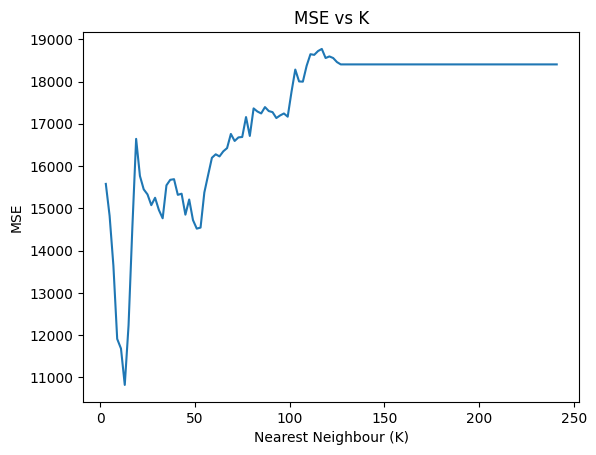

13

In [250]:
plt.plot(n, mse)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
mse.index(min(mse))*2+3

In [251]:
knn_1 = KNNImputer(n_neighbors=mse.index(min(mse))*2+3)
knn_1.fit_transform(X_train)
missing_numerical_filled = pd.DataFrame(knn_1.transform(missing_numerical), columns=missing_numerical.columns)
zero_missing = pd.concat([zero_missing, missing_numerical_filled], axis=0)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.000000,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.000000,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.000000,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.000000,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.000000,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.15,31.538462,205.0,70.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51,0.05,32.307692,220.0,70.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52,0.15,24.615385,190.0,50.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53,0.25,37.692308,220.0,50.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
list(zero_missing.columns)[5:13]

['infill_pattern_concentric',
 'infill_pattern_grid',
 'infill_pattern_honeycomb',
 'infill_pattern_line',
 'infill_pattern_rectilinear',
 'infill_pattern_solid',
 'infill_pattern_triangle',
 'infill_pattern_zigzag']

In [253]:
n = []
r2 = []
for r in range(120):
  k=3+2*r
  knn = KNNImputer(n_neighbors=k, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features = list(zero_missing.columns)[5:13]
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  r1 = mean_squared_error(X_test.loc[:,list(zero_missing.columns)[5:13]], X_test_predicted.loc[:,list(zero_missing.columns)[5:13]])
  n.append(k)
  r2.append(r)

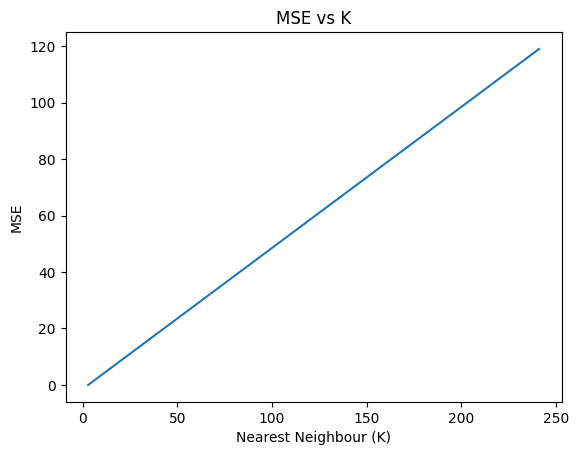

3

In [254]:
plt.plot(n, r2)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
r2.index(min(r2))*2+3

In [255]:
knn_2 = KNNImputer(n_neighbors=r2.index(min(r2))*2+3)
knn_2.fit_transform(X_train)
missing_categorical_filled = pd.DataFrame(knn_1.transform(missing_categorical), columns=missing_categorical.columns)
zero_missing = pd.concat([zero_missing, missing_categorical_filled], axis=0)
zero_missing
df1 = zero_missing

In [256]:
df1['material_pla-aluminum'].value_counts()

material_pla-aluminum
0.0    330
1.0      9
Name: count, dtype: int64

In [257]:
for row in range(len(df1)):
  max = df1.iloc[row,5:13].max()
  for a in range(9):
    if  df1.iloc[row,5+a]== max and max!=0:
      df1.iat[row,a+5]=1
    else:
      df1.iat[row,a+5]=0

In [258]:
df1 = df1[df1.iloc[:,5:13].sum(axis=1)!=2]
df1 = df1.reindex(columns=['layer_height', 'infill_density', 'nozzle_temperature', 'print_speed', 'infill_pattern_concentric', 'infill_pattern_grid',
                    'infill_pattern_honeycomb', 'infill_pattern_line','infill_pattern_rectilinear', 'infill_pattern_solid','infill_pattern_triangle',
                    'infill_pattern_zigzag', 'material_abs','material_pla', 'material_pla-aluminum','roughness'])
df1

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum,roughness
0,0.02,90.0,220.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
1,0.02,90.0,225.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0
2,0.02,80.0,230.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
3,0.02,70.0,240.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68.0
4,0.02,90.0,250.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.20,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.9
122,0.20,50.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.9
123,0.30,30.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.1
124,0.30,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.3


In [259]:
df1.to_csv('data_v2.csv')

In [260]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
param_grid = {'n_estimators':list(range(10, 201, 50))}
reg = GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid)
reg.fit(X_train,y_train)
reg.best_params_['n_estimators']
rt = RandomForestRegressor(n_estimators=reg.best_params_['n_estimators'], random_state=42)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)

0.5228317081289324

In [261]:
!pip install geneticalgorithm

from geneticalgorithm import geneticalgorithm as ga
def obj_fun(X):
    X = [X]
    results = rt.predict(X)
    return results

In [262]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||_____________________________________________ 10.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||________________________________________ 20.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||___________________________________ 30.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||______________________________ 40.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

 The best solution found:
 [1.17046450e-01 8.29894443e+01 2.91087892e+02 3.37649902e+01
 6.93675135e-01 9.94332250e-01 6.30763277e-03 4.18191617e-02
 1.89417754e-01 4.38138409e-01 1.58770677e-01 7.33217722e-01
 2.71785322e-01 7.71514643e-02 6.78347688e-01]

 Objective function:
 2.487746875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


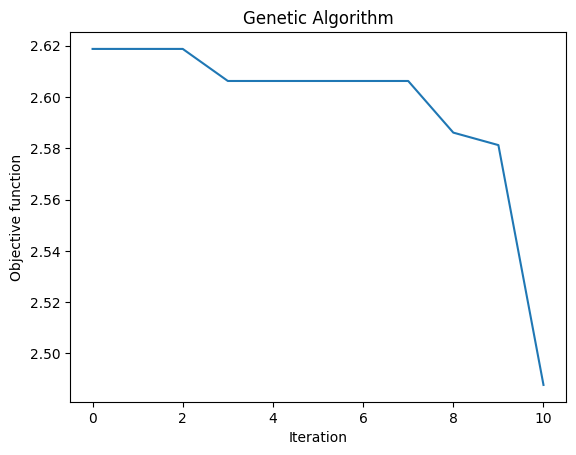

In [263]:
algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
ga_model=ga(function=obj_fun, dimension=15,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)
ga_model.run()

In [264]:
result = ga_model.output_dict

In [265]:
print("Results: ")
print('Layer Height:', result['variable'][0])
print('Infill Density:', result['variable'][1])
print('Nozzel Temperature:', result['variable'][2])
print('Print Speed:', result['variable'][3])

Results: 
Layer Height: 0.11704645008831191
Infill Density: 82.98944433222232
Nozzel Temperature: 291.08789178670975
Print Speed: 33.76499022004361


In [266]:
!pip install pandas-profiling

In [267]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum,roughness
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,0.185266,48.587847,223.831361,58.957670,0.008876,0.455621,0.192308,0.044379,0.032544,0.109467,0.044379,0.076923,0.159763,0.532544,0.026627,34.976738
std,0.097595,30.410129,27.963169,27.602854,0.093931,0.498765,0.394698,0.206240,0.177704,0.312688,0.206240,0.266864,0.366930,0.499679,0.161230,68.661872
min,0.020000,10.000000,190.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000
25%,0.100000,22.692308,200.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375000
50%,0.200000,40.000000,215.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000
75%,0.250000,78.750000,240.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,22.000000
max,0.400000,100.000000,300.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,368.000000


In [290]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.describe()

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
mean,7.894919e-17,-6.579099e-18,-4.111937e-16,-6.908054e-17,-6.579099e-18,-8.552829e-17,3.947460e-17,-1.480297e-17,5.263280e-17,1.973730e-17,-4.769847e-17,-1.644775e-17,6.579099e-18,1.299372e-16,1.315820e-17
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00
min,-1.712613e+00,-1.271334e+00,-1.235527e+00,-1.439622e+00,-8.638684e-02,-9.284767e-01,-4.825730e-01,-1.961161e-01,-1.856953e-01,-3.401507e-01,-2.156655e-01,-2.978417e-01,-4.472136e-01,-1.053269e+00,-1.373606e-01
25%,-8.509212e-01,-9.415688e-01,-8.760525e-01,-7.075844e-01,-8.638684e-02,-9.284767e-01,-4.825730e-01,-1.961161e-01,-1.856953e-01,-3.401507e-01,-2.156655e-01,-2.978417e-01,-4.472136e-01,-1.053269e+00,-1.373606e-01
50%,1.077115e-02,-2.820385e-01,-3.368409e-01,-3.415655e-01,-8.638684e-02,-9.284767e-01,-4.825730e-01,-1.961161e-01,-1.856953e-01,-3.401507e-01,-2.156655e-01,-2.978417e-01,-4.472136e-01,9.494253e-01,-1.373606e-01
75%,3.877615e-01,1.037022e+00,5.618452e-01,3.904723e-01,-8.638684e-02,1.077033e+00,-4.825730e-01,-1.961161e-01,-1.856953e-01,-3.401507e-01,-2.156655e-01,-2.978417e-01,-4.472136e-01,9.494253e-01,-1.373606e-01
max,2.380425e+00,1.696553e+00,2.718692e+00,3.318623e+00,1.157584e+01,1.077033e+00,2.072225e+00,5.099020e+00,5.385165e+00,2.939874e+00,4.636809e+00,3.357488e+00,2.236068e+00,9.494253e-01,7.280110e+00
